Lanza una moneda al aire 10 veces, ¿cuantos resultados posibles forman parte del espacio muestral?.

In [5]:
# Es un modelo Probabilistico => solo conocemos los resultados posibles no el proceso y sus variables
# resultados_posibles = espacio muestral(todas las opciones de resultados posibles) = cant. de opciones ^ cantidad de muestras
resultados_posibles = 2 ** 10
resultados_posibles

1024

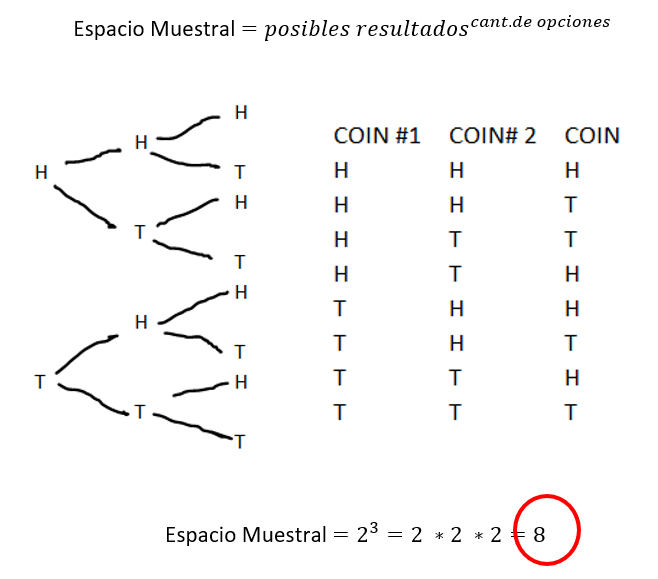

En un aeropuerto se tiene a 10 pasajeros esperando en la sala de preembarque, la polícia debe controlar a 3 de ellos. ¿Cuantas combinaciones posibles se pueden obtener?. <br>
Combinaciones de 3 en 10 sin repeticiones:<br>
<br>
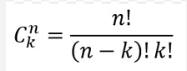

In [6]:
from math import factorial
# Combinacion sin repeticion de n = 10 y k = 3
comb_10_3 = factorial(10)/(factorial(10-3)*factorial(3)) 
comb_10_3

120.0

#### Combinaciones con repeticion<br>
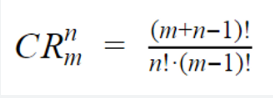

3. La Agencia Nacional de Seguridad Vial realizó una investigación para saber si los conductores de están usando sus cinturones de seguridad. Los datos muestrales fueron los siguientes:
Conductores que emplean el cinturón<br>
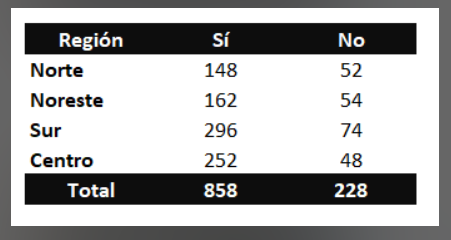

a) ¿Qué metodo cree que se utilizo para asignar probabilidades?.<br>
**Metodo frecuentista** porque se basa en la observacion de los resultados obtenidos en la realidad, ni subjetivista (dependiendo de la experiencia previa) no de un ensayo o experimento (bayesiano) o conociendo el proceso (deterministico).

b) Construya un cuadro similar, pero con la asignación de probabilidades.

In [16]:
# un cuadro es un Df de pandas con las probabilidades
import pandas as pd
regiones =['Norte','Noreste','Sur','Centro']
columns = ['Si','No']
valores_si = [148, 162, 296, 252]
valores_no = [52, 54, 74, 48]
datos = dict(Si = valores_si, No = valores_no)
print(datos)
cuadro = pd.DataFrame(datos, index=regiones)
print(cuadro.sum())
cuadro = cuadro / (sum(cuadro.sum()))
print(cuadro)
cuadro.loc[5] = sum(cuadro.Si), sum(cuadro.No) # agrego la ultima fila con los totales
cuadro = cuadro.rename(index={5: 'Total'}) # renombro a la ultima fila
cuadro = cuadro.assign(Total = cuadro.Si + cuadro.No)

cuadro

{'Si': [148, 162, 296, 252], 'No': [52, 54, 74, 48]}
Si    858
No    228
dtype: int64
               Si        No
Norte    0.136280  0.047882
Noreste  0.149171  0.049724
Sur      0.272560  0.068140
Centro   0.232044  0.044199


,Si,No,Total
Norte,0.136280,0.047882,0.184162
Noreste,0.149171,0.049724,0.198895
Sur,0.272560,0.068140,0.340700
Centro,0.232044,0.044199,0.276243
Total,0.790055,0.209945,1.000000


c) ¿Cuál sería el mejor método pára estimar la probabilidad de que en Estados Unidos un conductor lleve puesto el cinturón?<br>
### prob_si = todos los si / Total de muestras

In [17]:
cuadro.loc['Total']['Si']

0.7900552486187845

d) Un año antes, la probabilidad en Argentina de que un conductor llevara puesto el cinturón era 0.75. El director de ANSV, se esperaba que la probabilidad llegara a 0.78. ¿Estará satisfecho con los resultados del estudio? <br>
### Si, porque hoy la probabilidad paso de 0.75 a 0.79

e) ¿Cuál es la probabilidad de que se use el cinturón en las distintas regiones del país? ¿En qué región se usa más el cinturón?

In [18]:
cuadro['Si']


Norte      0.136280
Noreste    0.149171
Sur        0.272560
Centro     0.232044
Total      0.790055
Name: Si, dtype: float64

In [23]:
cuadro.loc['Norte':'Centro','Si'].max() # sacando el total

0.27255985267034993

4. Crear una funcion que permita calcular a probabilidad de los siguientes eventos en un baraja de 52 cartas.<br>
A - Obtener una carta roja.<br>
B - Obtener una carta negra.<br>
C - Obtener una pica.<br>
D - Obtener un trébol.<br>
E - Obtener un corazón.<br>
F - Obtener un diamante.<br>

In [29]:
prob_carta = 1/52 # una carta cualquiera
print("una carta cualquiera", prob_carta)   
prob_roja = 26/52 # prob de una carta roja
print("A ",'prob de una carta roja', prob_roja)
prob_negra = 26/52 # prob de una carta negra
print("B ",'prob de una carta negra', prob_negra)
prob_pica = 1/4
print("C ", "prob de una carta de picas", prob_pica)
prob_trebol= 1/4
print("D ", "prob de una carta de trebol", prob_pica)
prob_corazon= 1/4
print("E ", "prob de una carta de corazon", prob_pica)
prob_diamante= 1/4
print("F ", "prob de una carta de diamante", prob_pica)


una carta cualquiera 0.019230769230769232
A  prob de una carta roja 0.5
B  prob de una carta negra 0.5
C  prob de una carta de picas 0.25
D  prob de una carta de trebol 0.25
E  prob de una carta de corazon 0.25
F  prob de una carta de diamante 0.25


5. La probabilidad de que salga un 7 o un 8 al seleccionar una carta de una baraja de las 52 cartas que contiene el mazo. <br>
#### prob(7 u 8) = prob_7 + prob_8 <br>
#### prob_7 = 4/52<br>
#### prob_8 = prob_7 = 4/52<br>

In [30]:
prob_7_or_8 = 8/52
prob_7_or_8

0.15384615384615385

7. Un experimento que tiene tres resultados es repetido 50 veces y se ve que E1 aparece 20 veces, E2 13 veces y E3 17 veces. Asigne probabilidades a los resultados.<br>

In [37]:
resultados = ['E1','E2',"E3"]
observaciones = [ 20,13,17]
data = pd.DataFrame(observaciones,index=resultados)
data.sum()

0    50
dtype: int64

In [38]:
data.loc['Total'] = (data.sum()) 
data

,0
E1,20
E2,13
E3,17
Total,50


In [42]:
data['prob'] = data/50
data

,0,prob
E1,20,0.40
E2,13,0.26
E3,17,0.34
Total,50,1.00


### Integrador

1. Si la probabilidad de que un cliente pague en efectivo (E) es 6/15, con tarjeta de crédito (TD) es 7/15 y con tarjeta de débito (TD) es 2/15. Hallar la probabilidad de que dos clientes sucesivos que pagan sus cuentas lo hagan:<br>
 a) el primero en efectivo y el segundo con tarjeta de crédito.<br>
 b) Los dos clientes en efectivo<br>

In [45]:
# los eventos son mutuamente excluyentes ya que si pago con efectivo, no puedo pagar con otro medio.
# pero la combinacion es una combinacion con reposicion porque cada cliente es independiente del anterior o futuro.
efectivo = 6/15
tarjeta = 7/15
debito = 2/15

In [46]:
# 1. primero en efectivo y segundo con tarjeta de credito
prob_1 = efectivo * tarjeta
prob_1

0.18666666666666668

In [47]:
# 2. Los dos clientes en efectivo
prob_2 = efectivo * efectivo
prob_2

0.16000000000000003


2. La probabilidad de que un Henry repruebe el M1 de 0.8, de que apruebe M2 es 0.5 y de que repruebe el M3 es de 0.4.<br>
 (Los eventos no interfieren entre si) <br>
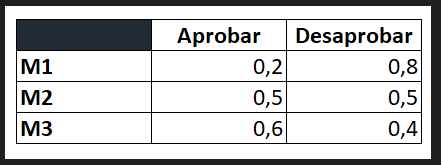

Determinar la probabilidad de que:<br>
 a) Apruebe un módulo.<br>
 b) Repruebe las tres materias.



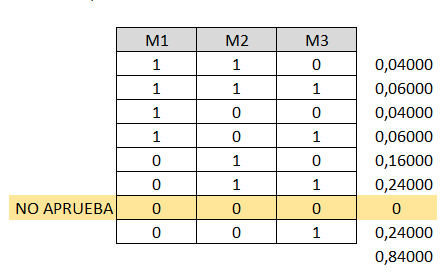 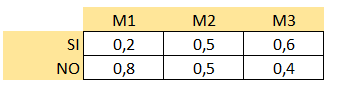

In [51]:
# el espacio muestral es 2^3 porque son dos posibles salidas (aprobado, no aprobado) para cada instancia
# y son 3 instancias
# A Apruebe un modulo cualquiera
# prob_aprobar = A*B+A*B*C+A+A*C+B+B*C+C
AB = 0.2 * 0.5 * 0.4
ABC = 0.2*0.5*0.6
A =0.2*0.5*0.4
AC = 0.2*0.5*0.6
B =0.8*0.5*0.4
BC =0.8*0.5*0.6
C =0.8*0.5*0.6
Prob = AB+ABC+A+AC+B+BC+C
Prob

0.8400000000000001

In [52]:
# B Repurebe las tres materias
# Prob_No_M1*Prob_No_M2*Prob_No_M3
desaprobado_noA_noB_noC = 0.8*0.5*0.4
desaprobado_noA_noB_noC 

0.16000000000000003